<a href="https://colab.research.google.com/github/venky9885/ML_Linear_Regression/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Scrap flipkart website
from bs4 import BeautifulSoup
import requests
import csv
 
def scrapESPN(url):
  p = requests.get(url)
  soup = BeautifulSoup(p.content, 'html.parser')
  content = soup.find_all('tr', class_='data1')
  #print('hai',content)
  fields = ['Name','Span','Mat','Inns','NO','RunsDescending','HS','Ave','BF','SR','100','50','0','']
  
  itemfull = []
  for item in content:
    items = []
    playerdata=(item.find_all('td'))
    for i in playerdata:
      items.append(i.text)
    itemfull.append(items)
  
  
  with open("ESPNcricstats.csv", 'w') as csvfile:  
      # creating a csv writer object  
      csvwriter = csv.writer(csvfile)
      csvwriter.writerow(fields)
      csvwriter.writerows(itemfull)

url1 = "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;"
url2 = ""
url3 = "template=results;type=batting"
url = url1+url2+url3
scrapESPN(url)
for i in range(2,54):
  url2 += str(i)
  url = url1+url2+url3
  scrapESPN(url)

In [ ]:
# Scrap flipkart website
from bs4 import BeautifulSoup
import requests
import csv
flag=1
def scrapESPN(url,flag):
  p = requests.get(url)
  soup = BeautifulSoup(p.content, 'html.parser')
  content = soup.find_all('tr', class_='data1')
  #print('hai',content)
  fields = ['Name','Span','Mat','Inns','NO','RunsDescending','HS','Ave','BF','SR','100','50','0','']
  
  itemfull = []
  for item in content:
    items = []
    playerdata=(item.find_all('td'))
    for i in playerdata:
      items.append(i.text)
    itemfull.append(items)
  
  
  with open("ESPNcricstats1.csv", 'a') as csvfile:  
      # creating a csv writer object  
        csvwriter = csv.writer(csvfile)
        if(flag==1):
        csvwriter.writerow(fields)
        flag=0
      csvwriter.writerows(itemfull)


url1 = "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;"
url2 = ""
url3 = "template=results;type=batting"
url = url1+url2+url3
flag=1
scrapESPN(url,1)
for i in range(2,25):
  url2 = "page="+str(i)+";"
  url = url1+url2+url3
  print(url)
  scrapESPN(url,0)

https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=2;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=3;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=4;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=5;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=6;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=7;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=8;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=9;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=10;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=1

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Coefficients: 
 [0.02816051]
Variance score: 0.032871761184134596


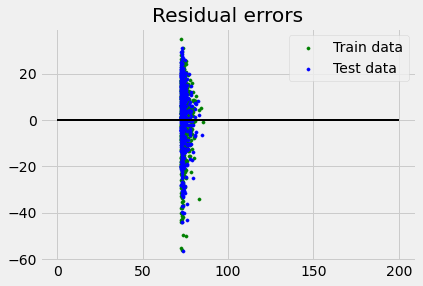

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv("ESPNcricstats1.csv")
data.head()

# Separate features and target
y = data["SR"]
x = data[["Inns","HS","Ave"]]

for i in range(len(x[["Inns"]])):
  x["Inns"][i] = int(x["Inns"][i])
  if "*" in x["HS"][i]:
    x["HS"][i]=x["HS"][i].replace("*","") 
  x["HS"][i] = int(x["HS"][i])

# Train and Test data
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1) 

# Define the multiple linear regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

plt.scatter(X_train,y_train)
# regression coefficients 
print('Coefficients: \n', linear_regression.coef_) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(linear_regression.score(X_test, y_test))) 

# plot for residual error 
## setting plot style 
plt.style.use('fivethirtyeight') 

## plotting residual errors in training data 
plt.scatter(linear_regression.predict(X_train),linear_regression.predict(X_train)-y_train, color = "green", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(linear_regression.predict(X_test),linear_regression.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data') 

## plotting line for zero residual error 
  plt.hlines(y = 0, xmin = 0, xmax = 200, linewidth = 2) 

## plotting legend 
plt.legend(loc = 'upper right') 

## plot title 
plt.title("Residual errors") 

## function to show plot 
plt.show()


Coefficients: 
 [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score: 0.7209056672661777


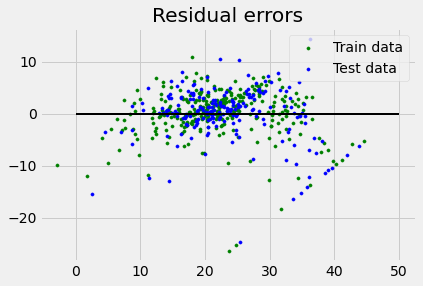

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
# load the boston dataset 
boston = datasets.load_boston(return_X_y=False) 
# defining feature matrix(X) and response vector(y) 
X = boston.data 
y = boston.target 
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1) 
# create linear regression object 
reg = linear_model.LinearRegression() 
# train the model using the training sets 
reg.fit(X_train, y_train) 
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
# plot for residual error 
## setting plot style 
plt.style.use('fivethirtyeight') 
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train),reg.predict(X_train)-y_train, color = "green", s = 10, label = 'Train data') 
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test),reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data') 
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
## plotting legend 
plt.legend(loc = 'upper right') 
## plot title 
plt.title("Residual errors") 
## function to show plot 
plt.show()
